# Autor:


*   Bruno Santome Antolín ⏩ 100405889

#Análisis de regresión del precio de los coches

Carga de fichero y de Librerias

In [638]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [639]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [640]:
%%R
lib_loc <- "/content/drive/MyDrive/Datos/r-lib"

In [641]:
%%R
#Carga datos de un fichero
dfMedidas <- read.csv("/content/drive/MyDrive/AnalisisDatos/Datos/car_price_prediction.csv", stringsAsFactors=TRUE)
dataset2<- read.csv("/content/drive/MyDrive/AnalisisDatos/Datos/car_price_prediction.csv",stringsAsFactors=TRUE)



# Descripción de los datos

In [642]:
%%R
head(dfMedidas)

        ID Price Levy Manufacturer    Model Prod..year  Category
1 45654403 13328 1399        LEXUS   RX 450       2010      Jeep
2 44731507 16621 1018    CHEVROLET  Equinox       2011      Jeep
3 45774419  8467    -        HONDA      FIT       2006 Hatchback
4 45769185  3607  862         FORD   Escape       2011      Jeep
5 45809263 11726  446        HONDA      FIT       2014 Hatchback
6 45802912 39493  891      HYUNDAI Santa FE       2016      Jeep
  Leather.interior Fuel.type Engine.volume   Mileage Cylinders Gear.box.type
1              Yes    Hybrid           3.5 186005 km         6     Automatic
2               No    Petrol             3 192000 km         6     Tiptronic
3               No    Petrol           1.3 200000 km         4      Variator
4              Yes    Hybrid           2.5 168966 km         4     Automatic
5              Yes    Petrol           1.3  91901 km         4     Automatic
6              Yes    Diesel             2 160931 km         4     Automatic
  Driv

In [643]:
%R -o dfMedidas

dfMedidas

,ID,Price,Levy,Manufacturer,Model,Prod..year,Category,Leather.interior,Fuel.type,Engine.volume,Mileage,Cylinders,Gear.box.type,Drive.wheels,Doors,Wheel,Color,Airbags
1,45654403,13328,115,33,1271,2010,5,2,3,64,2839,6.0,1,1,3,1,13,12
2,44731507,16621,5,9,654,2011,5,1,6,57,2961,6.0,3,1,3,1,2,8
3,45774419,8467,1,22,690,2006,4,1,6,23,3141,4.0,4,2,3,2,2,2
4,45769185,3607,513,17,660,2011,5,2,3,47,2414,4.0,1,1,3,1,15,0
5,45809263,11726,367,22,690,2014,4,2,6,23,7397,4.0,1,2,3,1,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19233,45798355,8467,1,37,448,1999,2,2,1,38,4395,4.0,2,3,2,1,13,5
19234,45778856,15681,505,24,1339,2011,10,2,6,45,2215,4.0,3,2,3,1,12,8
19235,45804997,26108,509,24,1451,2010,5,2,2,37,639,4.0,1,2,3,1,8,4
19236,45793526,5331,84,9,403,2007,5,2,2,37,5613,4.0,1,2,3,1,2,4


Como vemos el dataset tiene un total de 19237 filas distintas y 18 columnas. 
Cada fila representa los datos de un coche y cada una de las columnas representa un atributo. Vamos a ver que significa cada uno de ellos:

ID: El identificador del coche

Price: Nuestra variable objetivo, el precio asignado a el coche 

Levy:

Manufacturer: El nombre de la empresa fabricante

Model: El modelo del coche

Prod..year: EL año de producción del coche

Category: A que categoría pertenece ( no tengo claro cuales son) 

Leather.interior: Si el interior del coche es de cuero

Fuel.type: el tipo de combustible que necesita el vehículo

Engine.volume: El volumen del motor	

Cylinders: La cantidad de cilindros que contiene el coche

Mileage: El número de kilometros que tiene el coche

Gear.box.type: El tipo de coche (Automático,...)

Drive.wheels: Cuales son las ruedas de tracción del coche (4x4)/ (front) 

Doors: Cantdiad de puertas del coche

Wheel: Donde esta situado el volante

Color: El color del coche

Airbags: El número de airbags que tiene el vehículo

# Análisis descriptivo

Empezaremos análizando la variable Precio. 

In [644]:
%%R
if (!require("psych", lib.loc = lib_loc)) install.packages("psych", lib = lib_loc)
library(psych, lib.loc = lib_loc)

describe(dfMedidas$Price)

   vars     n     mean       sd median trimmed      mad min      max    range
X1    1 19237 18555.93 190581.3  13172 14153.4 12321.89   1 26307500 26307499
     skew kurtosis      se
X1 136.45 18817.67 1374.08


Vemos que la media esta en 18555 euros pero el maximo es muy superior: 26307500 euros. Esto indica que puede ser un dato átipico.
Vamos a representar a ver que obtenemos. 


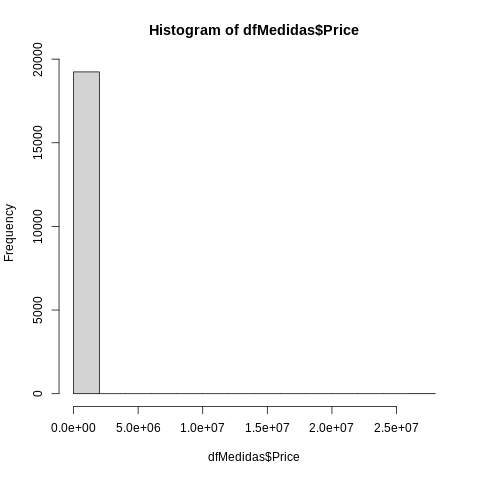

In [645]:
%%R
hist(dfMedidas$Price)

Vemos que es imposible representar, debido a los datos outliers. 
Hay que encontrarlos y eliminarlos. 

# Encontrar outliers

Primero quitamos el outlier del dato máximo, que por cierto es un vagon de tren. 

In [646]:
%%R
#Quitamos el outlier del maximo
dfMedidas<-dfMedidas[!(dfMedidas$Price == 26307500),]

In [647]:
%%R
#Dato curisoso ==> es un vagon de tren
dataset2[(dataset2$Price == 26307500),]

            ID    Price Levy Manufacturer Model Prod..year    Category
16984 45812886 26307500    -         OPEL Combo       1999 Goods wagon
      Leather.interior Fuel.type Engine.volume  Mileage Cylinders Gear.box.type
16984               No    Diesel           1.7 99999 km         4        Manual
      Drive.wheels  Doors      Wheel Color Airbags
16984        Front 02-Mar Left wheel  Blue       0


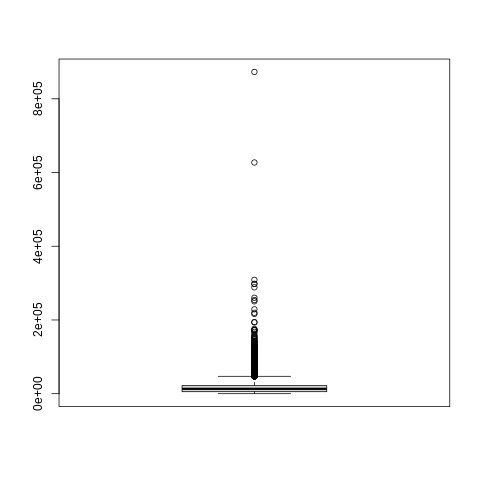

In [648]:
%%R
df2 <-dfMedidas
boxplot(df2$Price)

Con ese outlier menos, vemos en el boxplot superior que siguen habiendo varios datos que impiden la correcta representación de la variable Precio. 

Establecemos un limite inferior del 0.01 y un limite superior del 0.99 para acotar nuestros datos, evitando posibles outliers. 
Es decir, los datos van a estar comprendidos entre 45 euros y 84675 euros. 

In [649]:
%%R

lower_bound <- quantile(df2$Price, 0.01)
lower_bound

1% 
45 


In [650]:
%%R
upper_bound <- quantile(df2$Price, 0.99)
upper_bound

  99% 
84675 


In [651]:
%%R

dfoutliers <- which(df2$Price < lower_bound | df2$Price > upper_bound)
df3 <- df2[dfoutliers, "Price"]
dfMedidas <- df2[!(df2$Price %in% df3),] 



Representando nuestro conjunto de datos acotados, vemos una gran mejora en la representación de la variable objetivo. Ahora podemos ver que una gran cantidad de vehìculos tienen un precio muy bajo. 
Tambien se puede ver que hay pocos coches con precios superiores a 40 000 euros.

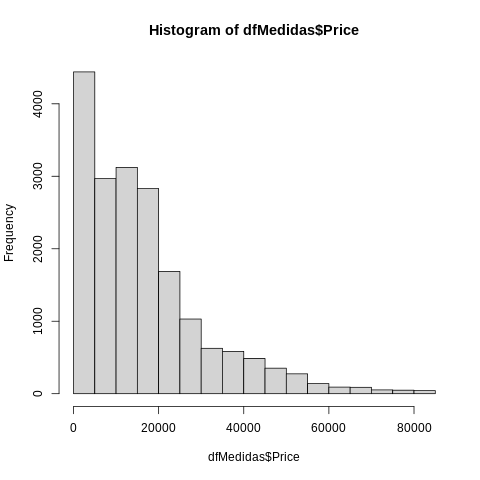

In [652]:
%%R
hist(dfMedidas$Price)


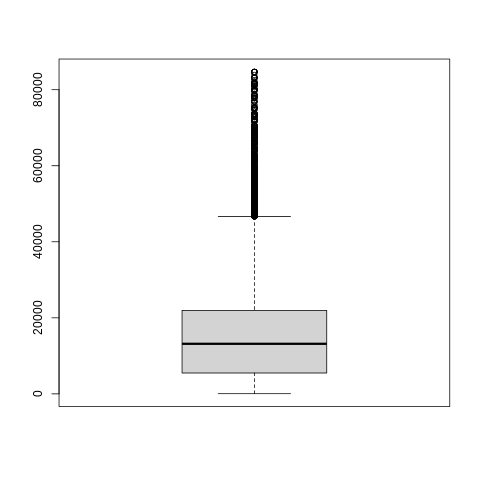

In [653]:
%%R 
boxplot(dfMedidas$Price)


Con este boxplot vemos tambien que la representación de la variable a mejorado en comparación al anterior boxplot. Parece que siguen habiendo muchos datos atipicos, pero hay que investigar más

In [654]:
%%R
summary(dfMedidas$Price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     45    5488   13172   16284   21953   84675 


Vamos a ver la tendencía de el atributo a seguir una distribución normal. 

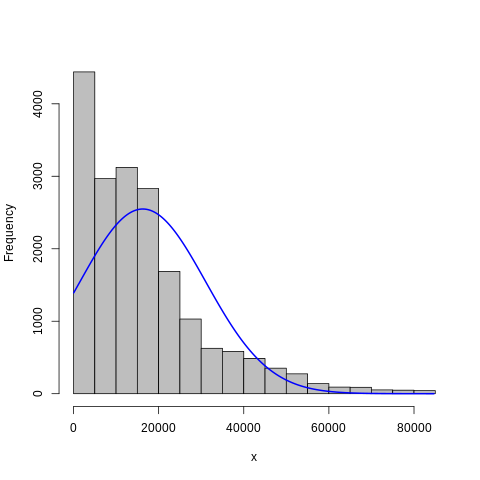

In [655]:
%%R
if (!require("rcompanion", lib.loc = lib_loc)) install.packages("rcompanion", lib = lib_loc)
library(rcompanion, lib.loc = lib_loc)

plotNormalHistogram(dfMedidas$Price)

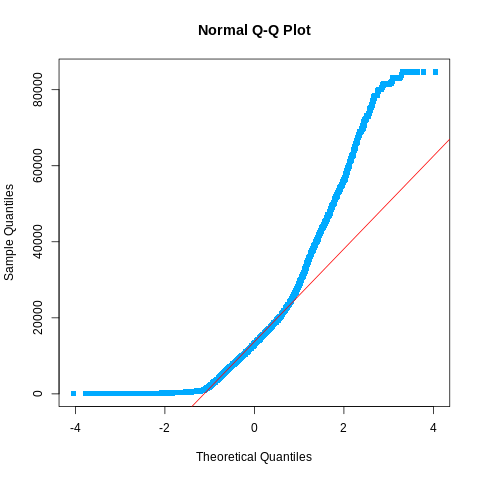

In [656]:
%%R
qqnorm(dfMedidas$Price, pch = 15, col = "#00AAFF")
qqline(dfMedidas$Price, col = "red")


Concluimos que el atributo "Precio" no parece seguir una distribución normal.

Claramente hay datos átipicos. 

#Eliminar columnas y transformación de datos

Eliminamos las columnas ID porque es uniforme a traves de toda la tabla de datos luego no nos aporta información

In [657]:
%%R

dfMedidas <- dfMedidas[,!names(dfMedidas) %in% c("ID")]


Hay que limpiar la columna de Levy; quitar "-" de las celdas. Luego pasamos el atributo a númerico.

In [658]:
%%R
dfMedidas[dfMedidas$Levy == "-", "Levy"]  <- NA
dfMedidas$Levy <- as.numeric(dfMedidas$Levy)

Pasamos a integers los doubles de la columna de cilindros.

In [659]:
%%R
dfMedidas$Cylinders <- as.integer(dfMedidas$Cylinders)

Quitamos el charácter "km" de todas las columnas de Mileage

In [660]:
%%R

dfMedidas$Mileage<-gsub("km","",as.character(dfMedidas$Mileage))
head(dfMedidas)

  Price Levy Manufacturer    Model Prod..year  Category Leather.interior
1 13328  115        LEXUS   RX 450       2010      Jeep              Yes
2 16621    5    CHEVROLET  Equinox       2011      Jeep               No
3  8467   NA        HONDA      FIT       2006 Hatchback               No
4  3607  513         FORD   Escape       2011      Jeep              Yes
5 11726  367        HONDA      FIT       2014 Hatchback              Yes
6 39493  529      HYUNDAI Santa FE       2016      Jeep              Yes
  Fuel.type Engine.volume Mileage Cylinders Gear.box.type Drive.wheels  Doors
1    Hybrid           3.5 186005          6     Automatic          4x4 04-May
2    Petrol             3 192000          6     Tiptronic          4x4 04-May
3    Petrol           1.3 200000          4      Variator        Front 04-May
4    Hybrid           2.5 168966          4     Automatic          4x4 04-May
5    Petrol           1.3  91901          4     Automatic        Front 04-May
6    Diesel          

Pasamos a integer toda la columna de Mileage

In [661]:
%%R
dfMedidas$Mileage = as.integer(dfMedidas$Mileage)
typeof(dfMedidas$Mileage)

[1] "integer"


Al pasar a integer vamos  a evaluar como estan los datos en la columna Mileage. 

Hay muchos datos átipicos. 

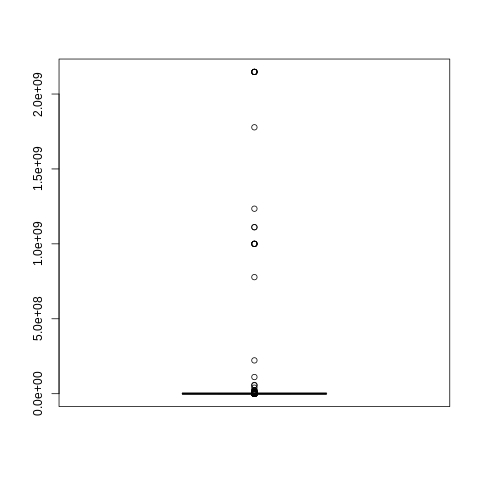

In [662]:
%%R
boxplot(dfMedidas$Mileage)

Para conseguir una representación de los datos del volante en un histograma transformamos la variable a factor y luego a integer. 

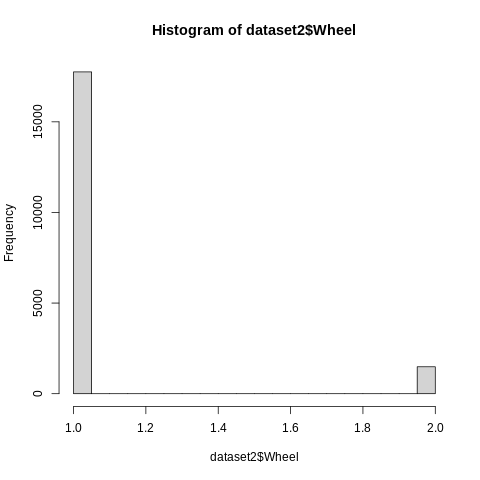

In [663]:
%%R
val_fact = factor(dataset2$Wheel)
df <- unclass(val_fact)
dataset2$Wheel = as.integer(df)
hist(dataset2$Wheel)



Hay muy pocos volantes a la derecha luego consideramos quitar la columna porque no aporta mucha información, antes de quitarla hay que esperar a confirmar que este atributo no tiene correlación con el Precio.

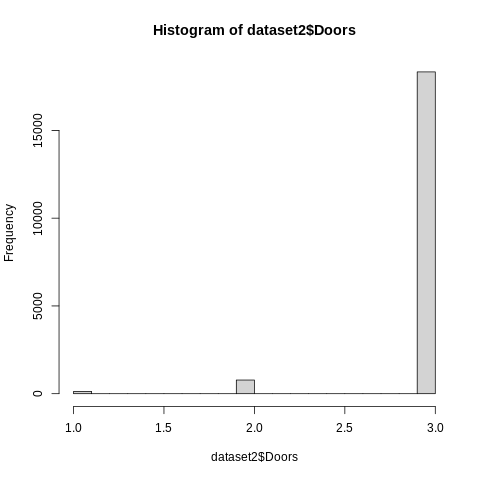

In [664]:
%%R
val_fact = factor(dataset2$Doors)
df <- unclass(val_fact)
dataset2$Doors = as.integer(df)
hist(dataset2$Doors)


Lo mismo ocurre con las puertas la gran mayoria tiene 4 puertas, luego no aportan mucha información distinctiva para el precio. Hay que investigar más. 

# Tratamiento de valor nulos en las columnas 



Vemos que hay una gran cantidad de valores nulos en el dataset

In [665]:
%%R
sum(is.na(dfMedidas))

[1] 5575


In [666]:
%%R
colnames(dfMedidas)

 [1] "Price"            "Levy"             "Manufacturer"     "Model"           
 [5] "Prod..year"       "Category"         "Leather.interior" "Fuel.type"       
 [9] "Engine.volume"    "Mileage"          "Cylinders"        "Gear.box.type"   
[13] "Drive.wheels"     "Doors"            "Wheel"            "Color"           
[17] "Airbags"         


Localizando donde se encuentran estos valores, vemos que todos están en la misma columna, La de Levy. 

In [667]:
%%R 
sum(is.na(dfMedidas$Levy))

[1] 5575


In [668]:
%%R
nrow(dfMedidas)

[1] 18864


Nos desacemos de una enorme cantidad de datos duplicados ( al rededor de 3500 datos estan duplicados) 

In [669]:
%%R
dfMedidas <- dfMedidas[!duplicated(dfMedidas),]
nrow(dfMedidas) 

[1] 15383


Todos los valores nulos se encuentran en Levy. Vamos a eliminar esta columna puesto que no podemos asignar un valor a cada celda ya que 
ya que perjudicaría en la busqueda del modelo final predictivo. De todas formas, antes de eliminar vamos  a ver la correlación con el precio. 

#Representación de los Datos respecto a la variable Precio

Usamos distintas gráficas de la librería ggplot2 para representar cada atributo con respecto al Precio. 

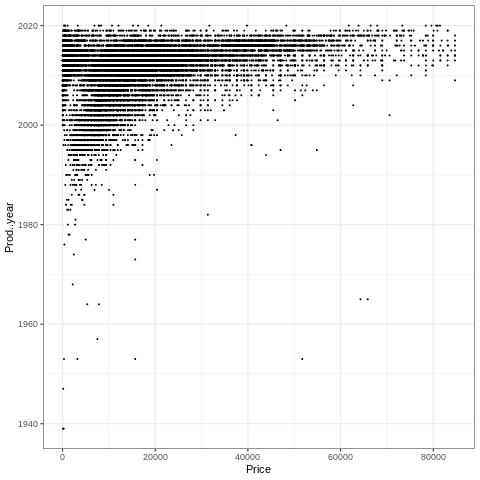

In [670]:
%%R
library(ggplot2)
ggplot(dfMedidas, aes(x = Price, y = Prod..year)) + geom_point(size=0.3) + theme_bw()

Con esta gráfica vemos el comportamiento del precio a lo largo de los años de producción, claramente a partir de 1990 hay una curva exponencial del aumento tanto de coches como de precio. 

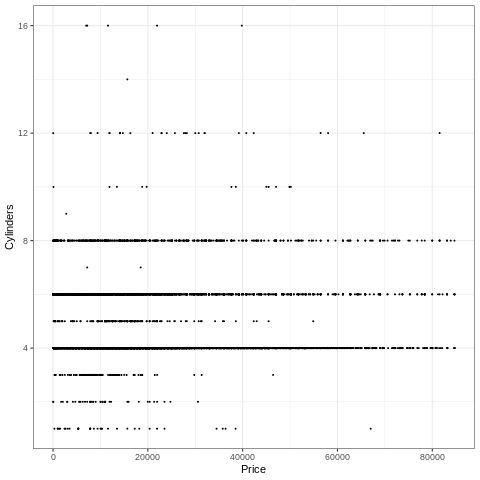

In [671]:
%%R
library(ggplot2)
ggplot(dfMedidas, aes(x = Price, y = Cylinders)) + geom_point(size=0.3) + theme_bw()

Vemos que la mayoría de coches tienen 4, 6 o 8 cilindros. 
Estos tambíen tienen un rango de precio más grande que el resto. 


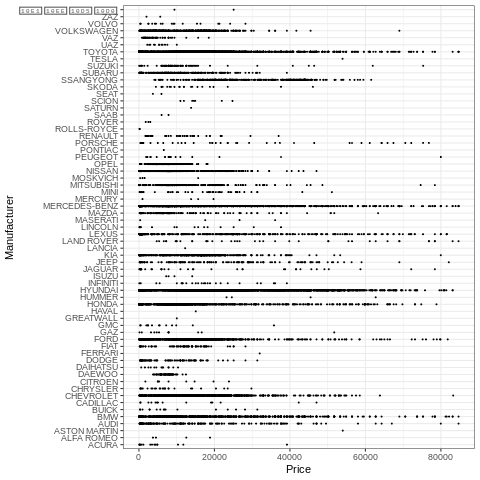

In [672]:
%%R
library(ggplot2)
ggplot(dfMedidas, aes(x = Price, y = Manufacturer)) + geom_point(size=0.3) + theme_bw()

Hay alrededor de 63 fabricantes distintos. Destacan como principales fabricantes en cuanto a cantidad de coches y precio: Toyota, Hyundai, BMW, Mercedes y Honda. 

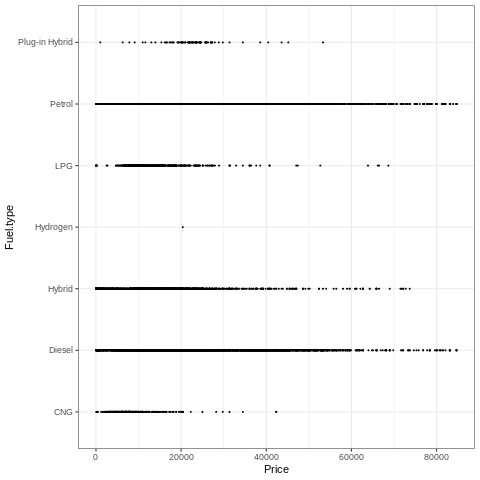

In [673]:
%%R
library(ggplot2)
ggplot(dfMedidas, aes(x = Price, y = Fuel.type)) + geom_point(size=0.3) + theme_bw()

El tipo de combustible. 
Hay un solo coche que usa Hidrogeno. 
La Gasolina y el Diesel predominan en cantidades y precio. Diría basandome en la gráfica que los coches con gasolina pueden llegar a ser más caros que los de Diesel. 

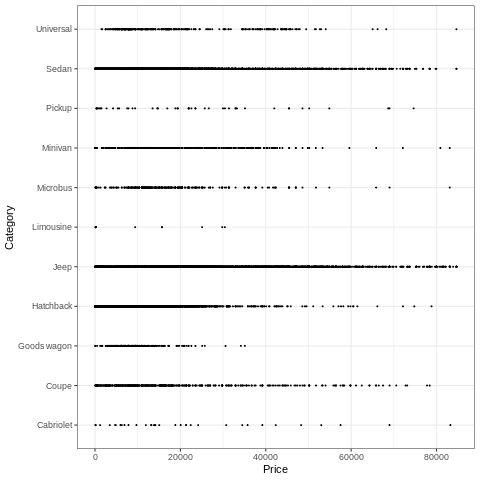

In [674]:
%%R
library(ggplot2)
ggplot(dfMedidas, aes(x = Price, y = Category)) + geom_point(size=0.3) + theme_bw()

Vemos que la mayoría de coches estan entre la categoría de Jeep y Sedan. Hay poquitas limusinas, y posiblemente bastantes Hatchback. 

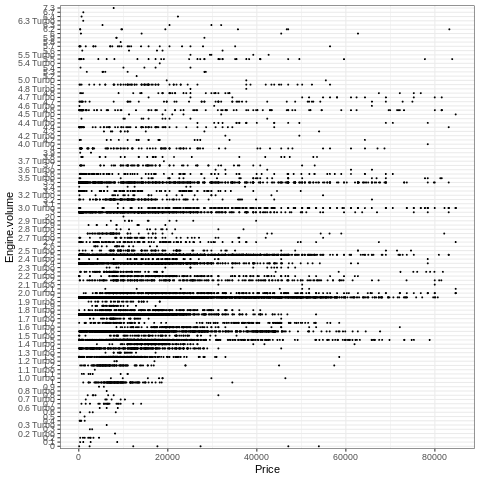

In [675]:
%%R
library(ggplot2)
ggplot(dfMedidas, aes(x = Price, y = Engine.volume)) + geom_point(size=0.3) + theme_bw()

Rango alto de tipos de volumenes del motor. Predomina el 2.0 con Turbo. La mayoría de datos esta comprendida entre el 1.3 Turbo y el 3.5 Turbo. 

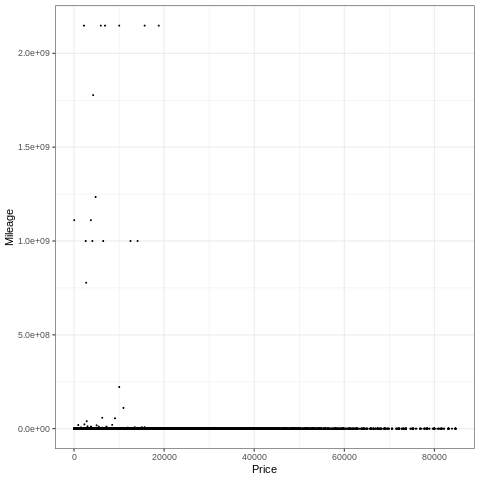

In [676]:
%%R
library(ggplot2)
ggplot(dfMedidas, aes(x = Price, y = Mileage)) + geom_point(size=0.3) + theme_bw()

No se pueden representar bien los kilometros con respecto al precio, de todas formas vemos que hay literalmente de todo tipo de cantidades de kilometros. 
Se puede ver tambíen que la mayoría de coches esta comprendida entre los 0 y los 40 000 euros. 

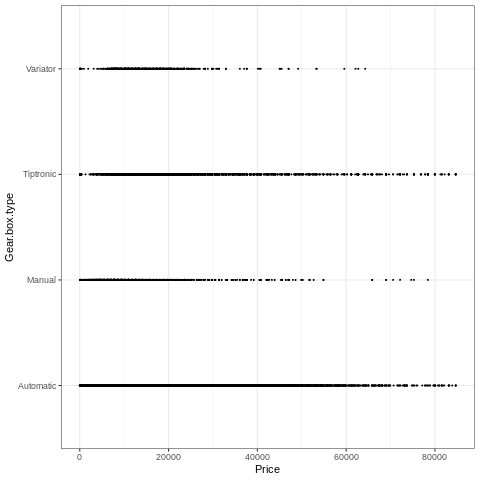

In [677]:
%%R
library(ggplot2)
ggplot(dfMedidas, aes(x = Price, y = Gear.box.type)) + geom_point(size=0.3) + theme_bw()

Con esto vemos los cuatro tipos de coches, siendo el dominante el coche Automático. 

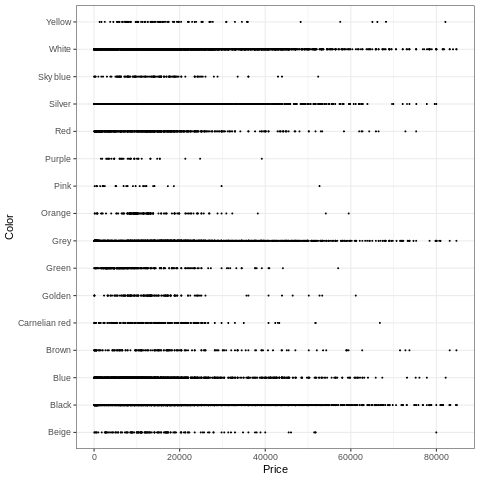

In [678]:
%%R
library(ggplot2)
ggplot(dfMedidas, aes(x = Price, y = Color)) + geom_point(size=0.3) + theme_bw()

Podemos ver los distintos tipos de colores de coches. No tiene pinta que afecte mucho al precio. 

# Estudio de Correlación. 


Ahora hay que estudiar la correlación de las variables con el precio para ver si hay posibles variables redundantes e irrelevantes/relevantes.


In [679]:
%%R
if (!require("mvtnorm", lib.loc = lib_loc)) install.packages("mvtnorm", lib = lib_loc)
if (!require("polycor", lib.loc = lib_loc)) install.packages("polycor", lib = lib_loc)
library(polycor, lib.loc = lib_loc)

correl <- hetcor(dfMedidas$Price,dfMedidas$Levy, ML = FALSE, std.err = TRUE, 
use=c("complete.obs", "pairwise.complete.obs"), 
bins=4, pd=TRUE, parallel=True, ncores=detectCores(logical=FALSE),
thresholds=FALSE)
correl




Two-Step Estimates

Correlations/Type of Correlation:
                dfMedidas$Price dfMedidas.Levy
dfMedidas$Price               1        Pearson
dfMedidas.Levy         -0.01325              1

Standard Errors:
[1] ""        "0.01004"

n = 9924 

P-values for Tests of Bivariate Normality:
[1] ""  "0"


Correlación bajisima, luego despues de nuestras conclusiones por la gran cantidad de valores NA en las celdas, quitamos el atributo Levy del conjunto de datos 

In [680]:
%%R
dfMedidas <- dfMedidas[,!names(dfMedidas) %in% c("Levy")]


Primero evaluamos la correlación de las variables númericas 

In [681]:
%%R
if (!require("mvtnorm", lib.loc = lib_loc)) install.packages("mvtnorm", lib = lib_loc)
if (!require("polycor", lib.loc = lib_loc)) install.packages("polycor", lib = lib_loc)
library(polycor, lib.loc = lib_loc)

correl <- hetcor(dfMedidas$Price,dfMedidas$Cylinders, ML = FALSE, std.err = TRUE, 
use=c("complete.obs", "pairwise.complete.obs"), 
bins=4, pd=TRUE, parallel=True, ncores=detectCores(logical=FALSE),
thresholds=FALSE)
correl


Two-Step Estimates

Correlations/Type of Correlation:
                    dfMedidas$Price dfMedidas.Cylinders
dfMedidas$Price                   1             Pearson
dfMedidas.Cylinders         0.06419                   1

Standard Errors:
[1] ""        "0.00803"

n = 15383 

P-values for Tests of Bivariate Normality:
[1] ""  "0"


El precio no parece correlar con los cilindros. 

In [682]:
%%R
if (!require("mvtnorm", lib.loc = lib_loc)) install.packages("mvtnorm", lib = lib_loc)
if (!require("polycor", lib.loc = lib_loc)) install.packages("polycor", lib = lib_loc)
library(polycor, lib.loc = lib_loc)

correl <- hetcor(dfMedidas$Price,dfMedidas$Mileage, ML = FALSE, std.err = TRUE, 
use=c("complete.obs", "pairwise.complete.obs"), 
bins=4, pd=TRUE, parallel=True, ncores=detectCores(logical=FALSE),
thresholds=FALSE)
correl


Two-Step Estimates

Correlations/Type of Correlation:
                  dfMedidas$Price dfMedidas.Mileage
dfMedidas$Price                 1           Pearson
dfMedidas.Mileage        -0.02106                 1

Standard Errors:
[1] ""         "0.008059"

n = 15383 

P-values for Tests of Bivariate Normality:
[1] ""  "0"


In [683]:
%%R
if (!require("mvtnorm", lib.loc = lib_loc)) install.packages("mvtnorm", lib = lib_loc)
if (!require("polycor", lib.loc = lib_loc)) install.packages("polycor", lib = lib_loc)
library(polycor, lib.loc = lib_loc)

correl <- hetcor(dfMedidas$Price,dfMedidas$Airbags, ML = FALSE, std.err = TRUE, 
use=c("complete.obs", "pairwise.complete.obs"), 
bins=4, pd=TRUE, parallel=True, ncores=detectCores(logical=FALSE),
thresholds=FALSE)
correl


Two-Step Estimates

Correlations/Type of Correlation:
                  dfMedidas$Price dfMedidas.Airbags
dfMedidas$Price                 1           Pearson
dfMedidas.Airbags        -0.02268                 1

Standard Errors:
[1] ""         "0.008059"

n = 15383 

P-values for Tests of Bivariate Normality:
[1] ""  "0"


Tampoco correla con la cantdiad de airbags o los kilometros de los vehículos. EL resultado del test Pearson es muy pequeño en ambos casos. 

In [684]:
%%R
#Analisis de correlación polyserial. 
if (!require("mvtnorm", lib.loc = lib_loc)) install.packages("mvtnorm", lib = lib_loc)
if (!require("polycor", lib.loc = lib_loc)) install.packages("polycor", lib = lib_loc)
library(polycor, lib.loc = lib_loc)

print(polyserial(dfMedidas$Price, dfMedidas$Category))
print(polyserial(dfMedidas$Price, dfMedidas$Doors))
print(polyserial(dfMedidas$Price, dfMedidas$Wheel))
print(polyserial(dfMedidas$Price, dfMedidas$Color))
print(polyserial(dfMedidas$Price, dfMedidas$Manufacturer))
print(polyserial(dfMedidas$Price, dfMedidas$Model))
print(polyserial(dfMedidas$Price, dfMedidas$Leather.interior))
print(polyserial(dfMedidas$Price, dfMedidas$Fuel.type))
print(polyserial(dfMedidas$Price, dfMedidas$Engine.volume))
print(polyserial(dfMedidas$Price, dfMedidas$Gear.box.type))



[1] -0.1045056
[1] 0.05569166
[1] -0.3055794
[1] -0.02265408
[1] -0.06041948
[1] 0.08977536
[1] 0.2479025
[1] -0.1236843
[1] 0.1486523
[1] 0.08983204


Claramente no hay una relación lineal entre ningún atributo. El indice de correlación de todos los atributos con respecto de el atributo objetivo Precio estan muy cercanos a 0, excepto el atributo de Wheel que tiene una relación inversa algo superior al resto de variables. 

Esto indica que claramente no hay una relación lineal entre los atributos. Es decir, descartamos la opción de un modelo de regresión lineal. Vamos a tener que probar con modelos de regresión no lineal.


Hemos visto anteriormente que los atributos que indican el número de puertas, el tipo de volante y el color del vehículo no aportan mucha información. Ademas, despues de realizar el test de correlación con respecto del precio y ver que los resultados indican que no tienen ningún tipo de relación con el precio, eliminamos Doors y Color. Ya que Wheels parece tener algun tipo de relación. 



In [685]:
%%R
dfMedidas <- dfMedidas[,!names(dfMedidas) %in% c("Doors","Color")]

#PCA
Encontrar entre los atributos numericos, los más relevantes. 
Para describirlos mejor. 

In [686]:
%%R
dfMedidas$Manufacturer <- as.numeric(dfMedidas$Manufacturer)
dfMedidas$Engine.volume <- as.numeric(dfMedidas$Engine.volume)
dfMedidas$Model <- as.numeric(dfMedidas$Model)
dfMedidas$Category <- as.numeric(dfMedidas$Category)
dfMedidas$Fuel.type <- as.numeric(dfMedidas$Fuel.type)
dfMedidas$Leather.interior <- as.numeric(dfMedidas$Leather.interior)
dfMedidas$Gear.box.type <- as.numeric(dfMedidas$Gear.box.type)
dfMedidas$Drive.wheels <- as.numeric(dfMedidas$Drive.wheels)
dfMedidas$Wheel <- as.numeric(dfMedidas$Wheel)

Pasamos todos los atributos a númericos para poder usarlos. 

In [687]:
%%R
head(dfMedidas)

  Price Manufacturer Model Prod..year Category Leather.interior Fuel.type
1 13328           33  1271       2010        5                2         3
2 16621            9   654       2011        5                1         6
3  8467           22   690       2006        4                1         6
4  3607           17   660       2011        5                2         3
5 11726           22   690       2014        4                2         6
6 39493           24  1305       2016        5                2         2
  Engine.volume Mileage Cylinders Gear.box.type Drive.wheels Wheel Airbags
1            64  186005         6             1            1     1      12
2            57  192000         6             3            1     1       8
3            23  200000         4             4            2     2       2
4            47  168966         4             1            1     1       0
5            23   91901         4             1            2     1       4
6            37  160931         

Metemos los atributos que queremos evaluar

In [688]:
%%R
atributos <- c("Price","Prod..year","Mileage","Cylinders","Airbags")

In [689]:
%%R
if (!require("ggpubr", lib.loc = lib_loc)) install.packages("ggpubr", lib = lib_loc)
if (!require("ggsci", lib.loc = lib_loc)) install.packages("ggsci", lib = lib_loc)
if (!require("dendextend", lib.loc = lib_loc)) install.packages("dendextend", lib = lib_loc)
if (!require("factoextra", lib.loc = lib_loc)) install.packages("factoextra", lib = lib_loc)
if (!require("FactoMineR", lib.loc = lib_loc)) install.packages("FactoMineR", lib = lib_loc)
library(factoextra, lib.loc = lib_loc)
library(FactoMineR, lib.loc = lib_loc)

res.pca <- prcomp(dfMedidas[,atributos], scale = TRUE) 
summary(res.pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5
Standard deviation     1.2053 1.0911 0.9965 0.9664 0.65560
Proportion of Variance 0.2905 0.2381 0.1986 0.1868 0.08596
Cumulative Proportion  0.2905 0.5286 0.7272 0.9140 1.00000


Obtenemos los porcentajes de los componentes principales

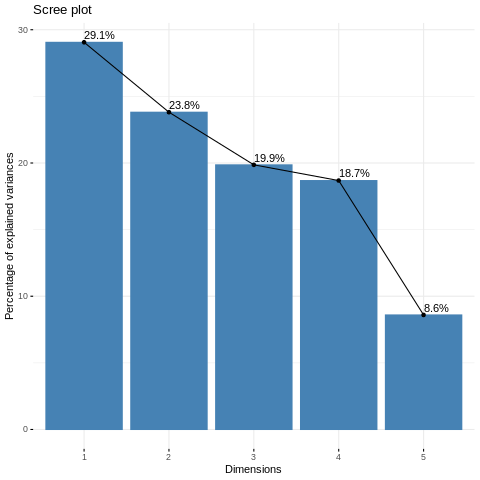

In [690]:
%%R
fviz_screeplot(res.pca, addlabels = TRUE)

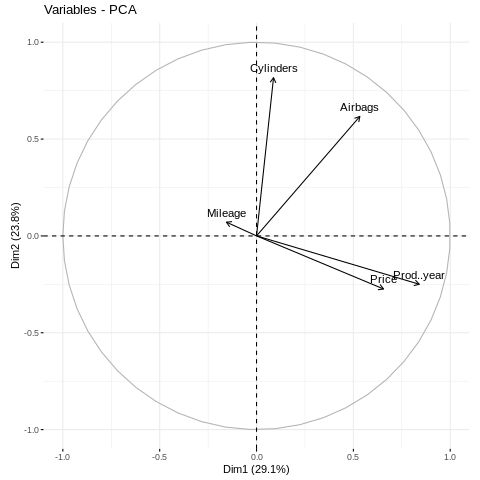

In [691]:
%%R
fviz_pca_var(res.pca)

Aqui vemos lo que ocurre un 50% de las veces. Podemos observar primero que los airbags no tienen ningún tipo de relación con el precio al ser el angulo de 90º. 

Se puede ver tambíen que hay una estrecha relación entre el año de producción y el precio. 

Hay una posible relación inversa entre el Precio y los kilometros, cuanto mayor sea el número de kilometros menor es el precio ¿? 

La situación del volante y los cilindros del vehículo se relacionan poco con el precio. 



Elegimos eliminar los Airbags del conjunto de atributos. 

In [692]:
%%R
dfMedidas <- dfMedidas[,!names(dfMedidas) %in% c("Airbags")]

Vamos a estudiar todo el conjunto de atributos pasados a númericos. Para ver si podemos describir el conjunto de datos mejor. 

In [693]:
%%R
atributos <- c("Price","Manufacturer","Model","Mileage","Prod..year","Category","Fuel.type","Engine.volume","Mileage","Cylinders","Gear.box.type")

In [694]:
%%R
if (!require("ggpubr", lib.loc = lib_loc)) install.packages("ggpubr", lib = lib_loc)
if (!require("ggsci", lib.loc = lib_loc)) install.packages("ggsci", lib = lib_loc)
if (!require("dendextend", lib.loc = lib_loc)) install.packages("dendextend", lib = lib_loc)
if (!require("factoextra", lib.loc = lib_loc)) install.packages("factoextra", lib = lib_loc)
if (!require("FactoMineR", lib.loc = lib_loc)) install.packages("FactoMineR", lib = lib_loc)
library(factoextra, lib.loc = lib_loc)
library(FactoMineR, lib.loc = lib_loc)

res.pca <- prcomp(dfMedidas[,atributos], scale = TRUE) 
summary(res.pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.4199 1.3586 1.2118 1.1558 1.03094 0.93906 0.91608
Proportion of Variance 0.1833 0.1678 0.1335 0.1214 0.09662 0.08017 0.07629
Cumulative Proportion  0.1833 0.3511 0.4846 0.6060 0.70264 0.78281 0.85910
                           PC8    PC9    PC10     PC11
Standard deviation     0.90519 0.6925 0.50094 2.99e-16
Proportion of Variance 0.07449 0.0436 0.02281 0.00e+00
Cumulative Proportion  0.93359 0.9772 1.00000 1.00e+00


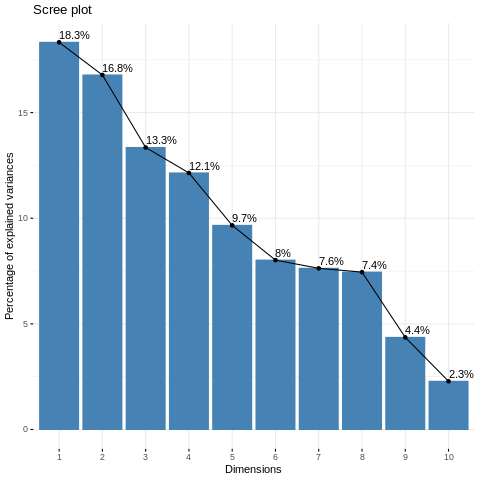

In [695]:
%%R
fviz_screeplot(res.pca, addlabels = TRUE)

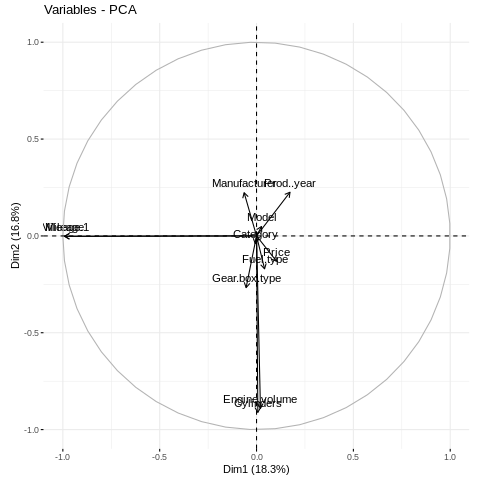

In [696]:
%%R
fviz_pca_var(res.pca)

Curiosamente el tamaño del motor y la cantidad de cilindros esta estrechamente relacionada con la componente principal 1

y Mileage y Wheel muy relacionados con la componente principal 2. 



# Random Forest

In [697]:
%%R
if (!require("FSelectorRcpp", lib.loc = lib_loc)) install.packages("FSelectorRcpp", lib = lib_loc)
library(FSelectorRcpp, lib.loc = lib_loc)
formula <- to_formula( c("Prod..year","Category","Manufacturer","Engine.volume","Model",
               "Leather.interior","Fuel.type","Cylinders",
               "Gear.box.type","Drive.wheels","Wheel"),"Price")

In [698]:
%%R
if (!require("randomForest", lib.loc = lib_loc)) install.packages("randomForest", lib = lib_loc)
library(randomForest, lib.loc = lib_loc)

#es precavido poner una seed, y hacer varias ejecuciones con distintas semillas y hacer una media. 
set.seed(1234)
modelo.rf <- randomForest(formula, data = dfMedidas, ntree=60,
                          keep.forest=FALSE, importance=TRUE)

rf_imp <- importance(modelo.rf, importance.type = 1)
print(rf_imp)


                   %IncMSE IncNodePurity
Prod..year       61.751899  766728027179
Category         16.228174  150751855765
Manufacturer     31.266546  216673711053
Engine.volume    35.830010  367781928504
Model            32.856239  374409457576
Leather.interior 18.035743   95548373136
Fuel.type        29.762882  230431968728
Cylinders        21.351893   89296176730
Gear.box.type    57.644851  202274618337
Drive.wheels     20.473311   85519804548
Wheel             8.820245   32702517877


Podemos ver que las variables con más peso para predecir el Precio según el random forest son el año de producción y el tipo de coche.

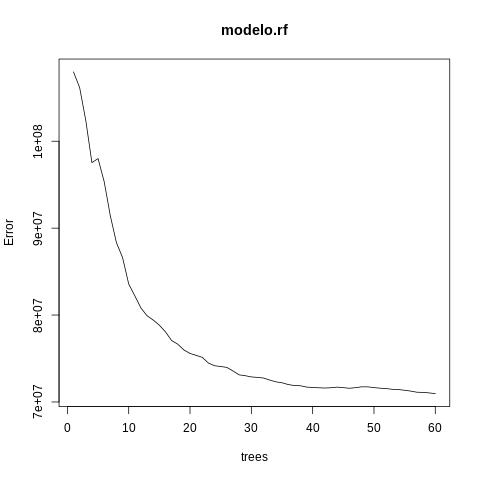

In [699]:
%%R 
plot(modelo.rf)

Nos resulta en un error gigantesco

#Conclusiones

Puedo afirmar que no hay un modelo de regresión lineal que pueda predecir el precio a partir de los atributos. 
Tampoco se ha conseguido encontrar un modelo en general que consiga predecir el precio. Los atributos que más importancía le daba nuestro modelo de random forest son el año de producción del coche y el tipo de coche. 

Puede que realmente no haya un modelo factible para la predicción del precio con estos datos. Pero admito que la parte de modelado le falta peso y por lo tanto no puedo hacer esta conclusión con total seguridad. 

He dejado de dedicarle tiempo a este dataset para hacer los otros trés.